In [83]:
import pandas as pd
import numpy as np

import requests
import os
import pandas as pd
import numpy as np
import nltk
pd.options.display.max_columns
pd.set_option("display.max_columns",100)

## AFFECT DIMENSIONS

In [2]:
AIL_df = pd.read_csv("../LEXIKA/fixed_greek_NRC_AIL_lex_2023_01_sorted_no_english.csv")
#or pd.read_csv("../LEXIKA/fixed_csvs/edited_nrc_AIL_lex.csv")

In [6]:
AIL_df

,Greek,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,αληθής,0.0,0.00,0.0,0.000,0.328,0.000,0.0,0.789
1,ααααααχ,0.0,0.00,0.0,0.344,0.000,0.000,0.0,0.000
2,ααααχ,0.0,0.00,0.0,0.234,0.000,0.000,0.0,0.000
3,άβακας,0.0,0.00,0.0,0.000,0.000,0.000,0.0,0.406
4,εγκαταλείπω,0.0,0.00,0.0,0.531,0.000,0.703,0.0,0.000
...,...,...,...,...,...,...,...,...,...
8869,ζεν,0.0,0.00,0.0,0.000,0.515,0.000,0.0,0.000
8870,πάθος,0.0,0.57,0.0,0.000,0.516,0.000,0.0,0.289
8871,ζέση,0.0,0.57,0.0,0.000,0.516,0.000,0.0,0.289
8872,ενθουσιασμός,0.0,0.57,0.0,0.000,0.516,0.000,0.0,0.289


In [7]:
#AIL_df.drop('English', axis=1, inplace=True)

In [8]:
AIL_df.columns

Index(['Greek', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'trust'],
      dtype='object')

In [9]:
df1 = AIL_df.set_index('Greek').stack().droplevel(0).reset_index(name='AffectDimension')

In [10]:
df1

,index,AffectDimension
0,anger,0.000
1,anticipation,0.000
2,disgust,0.000
3,fear,0.000
4,joy,0.328
...,...,...
70987,fear,0.000
70988,joy,0.516
70989,sadness,0.000
70990,surprise,0.000


In [11]:
df2 = AIL_df.set_index('Greek').stack().droplevel(1).reset_index(name='AffectDimension')

In [12]:
df2

,Greek,AffectDimension
0,αληθής,0.000
1,αληθής,0.000
2,αληθής,0.000
3,αληθής,0.000
4,αληθής,0.328
...,...,...
70987,όρεξη,0.000
70988,όρεξη,0.516
70989,όρεξη,0.000
70990,όρεξη,0.000


In [13]:
AIL_df = pd.merge(df2, df1, left_index=True, right_index=True)
AIL_df

,Greek,AffectDimension_x,index,AffectDimension_y
0,αληθής,0.000,anger,0.000
1,αληθής,0.000,anticipation,0.000
2,αληθής,0.000,disgust,0.000
3,αληθής,0.000,fear,0.000
4,αληθής,0.328,joy,0.328
...,...,...,...,...
70987,όρεξη,0.000,fear,0.000
70988,όρεξη,0.516,joy,0.516
70989,όρεξη,0.000,sadness,0.000
70990,όρεξη,0.000,surprise,0.000


In [14]:
AIL_df

,Greek,AffectDimension_x,index,AffectDimension_y
0,αληθής,0.000,anger,0.000
1,αληθής,0.000,anticipation,0.000
2,αληθής,0.000,disgust,0.000
3,αληθής,0.000,fear,0.000
4,αληθής,0.328,joy,0.328
...,...,...,...,...
70987,όρεξη,0.000,fear,0.000
70988,όρεξη,0.516,joy,0.516
70989,όρεξη,0.000,sadness,0.000
70990,όρεξη,0.000,surprise,0.000


In [15]:
AIL_df.drop('AffectDimension_y', axis=1, inplace=True)

In [16]:
AIL_df.rename(columns={'Greek': 'term', 'AffectDimension_x': 'score', 'index': 'AffectDimension'}, inplace=True)

In [17]:
AIL_df

,term,score,AffectDimension
0,αληθής,0.000,anger
1,αληθής,0.000,anticipation
2,αληθής,0.000,disgust
3,αληθής,0.000,fear
4,αληθής,0.328,joy
...,...,...,...
70987,όρεξη,0.000,fear
70988,όρεξη,0.516,joy
70989,όρεξη,0.000,sadness
70990,όρεξη,0.000,surprise


In [18]:
AIL_df = AIL_df[AIL_df.score != 0]

In [19]:
AIL_df.reset_index(drop=True, inplace = True)
AIL_df

,term,score,AffectDimension
0,αληθής,0.328,joy
1,αληθής,0.789,trust
2,ααααααχ,0.344,fear
3,ααααχ,0.234,fear
4,άβακας,0.406,trust
...,...,...,...
15652,ενθουσιασμός,0.516,joy
15653,ενθουσιασμός,0.289,trust
15654,όρεξη,0.570,anticipation
15655,όρεξη,0.516,joy


In [20]:
AIL_df[AIL_df.term=='πάθος']

,term,score,AffectDimension
9392,πάθος,0.633,anticipation
9393,πάθος,0.603,joy
9394,πάθος,0.469,trust
15645,πάθος,0.570,anticipation
15646,πάθος,0.516,joy
15647,πάθος,0.289,trust


In [21]:
AIL_df[AIL_df.term=='απαίσιος']

,term,score,AffectDimension
48,απαίσιος,0.664,disgust
49,απαίσιος,0.738,fear
960,απαίσιος,0.409,anger
961,απαίσιος,0.562,disgust
962,απαίσιος,0.672,fear
963,απαίσιος,0.641,sadness
4915,απαίσιος,0.545,anger
4916,απαίσιος,0.734,disgust
4917,απαίσιος,0.250,fear
5935,απαίσιος,0.742,anger


In [22]:
AIL_df = AIL_df.drop_duplicates(['term','AffectDimension'], keep='last')

In [23]:
AIL_df[AIL_df.term=='απαίσιος']

,term,score,AffectDimension
13570,απαίσιος,0.578,sadness
14895,απαίσιος,0.797,anger
14896,απαίσιος,0.641,disgust
14897,απαίσιος,0.594,fear


In [24]:
AIL_df.AffectDimension.value_counts()

fear            2167
anger           1939
trust           1776
sadness         1719
joy             1533
disgust         1497
anticipation    1127
surprise         859
Name: AffectDimension, dtype: int64

In [146]:
AIL_df.to_csv("../LEXIKA/AIL_KS.csv", index = False)

## Read Articles

In [75]:
df_news = pd.read_csv("../0_csvs_for_IQ_feed/processed_high_sites_2016.csv_Multiprocess_batch_15_Featured.csv")

In [76]:
df_news.columns

Index(['site', 'article_url', 'article_title', 'article_text', 'fb_in_id',
       'fb_url', 'fb_text', 'fb_datetime', 'fb_likes', 'fb_comments',
       'total_fb_posts', 'total_fb_likes', 'total_fb_comments', 'tw_in_id',
       'tw_url', 'tw_text', 'tw_datetime', 'tw_retweets', 'tw_mentions',
       'total_tweets', 'total_retweets', 'total_mentions', 'site_tw_followers',
       'site_tw_following', 'total_followers', 'total_following',
       'cleanedtext', 'cleaned_text_lemmas', 'anger', ' anticipation',
       'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise',
       'trust', 'valence', 'arousal', 'dominance', 'strongsubj', ' weaksubj',
       'flesch_reading_ease', 'flesch_kincaid_grade', 'smog', 'gunning_fog',
       'n_characters', 'n_sentences', 'dependency_distance_mean',
       'mean_word_length', 'n_stop_words', 'first_order_coherence', 'n_tokens',
       'n_unique_tokens', 'sources'],
      dtype='object')

## Count Words

In [77]:
#df_letter['num_wds'] = df_letter['tokenized'].apply(lambda x: len(x.split()))
df_news['num_wds'] = df_news['cleaned_text_lemmas'].apply(lambda x: len(x.split()) if pd.notna(x) and type(x) == str else 0)
df_news['num_wds'].mean()

157.72775

In [78]:
df_news['num_wds'].describe()

count    4000.000000
mean      157.727750
std       179.165206
min         1.000000
25%        45.000000
50%        90.000000
75%       218.000000
max      1617.000000
Name: num_wds, dtype: float64

Text(0.5, 0, 'Number of Words')

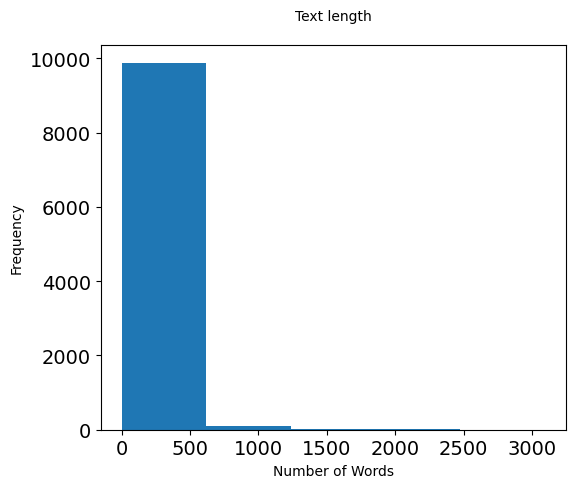

In [72]:
ax=df_news['num_wds'].plot(kind='hist', bins=5, fontsize=14, figsize=(6,5))
ax.set_title('Text length\n', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.set_xlabel('Number of Words', fontsize=10)

## Drop under 100 words

In [ ]:
#drop rows with texts< 100 words
df_news = df_news[ddf_news['num_wds'] >= 60]

In [79]:
df_news = df_news.reset_index()

In [84]:
df_news

,index,site,article_url,article_title,article_text,fb_in_id,fb_url,fb_text,fb_datetime,fb_likes,fb_comments,total_fb_posts,total_fb_likes,total_fb_comments,tw_in_id,tw_url,tw_text,tw_datetime,tw_retweets,tw_mentions,total_tweets,total_retweets,total_mentions,site_tw_followers,site_tw_following,total_followers,total_following,cleanedtext,cleaned_text_lemmas,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,valence,arousal,dominance,strongsubj,weaksubj,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,n_characters,n_sentences,dependency_distance_mean,mean_word_length,n_stop_words,first_order_coherence,n_tokens,n_unique_tokens,sources,num_wds,uniq_wds
0,0,gazzetta,http://www.gazzetta.gr/football/article/963744...,RT @Giorgio_Oddo: Μόνο ο Ανρί το έχασε | Πέναλ...,Δεν το κάνει μόνο η Μπαρτσελόνα. Οι παίκτες τ...,2728476.0,https://www.facebook.com/102175189751/posts/10...,Δεν το κάνει μόνο η Μπαρτσελόνα: Πέναλτι με πά...,2016-08-09T01:00:00Z,56.0,2.0,1.0,56.0,2.0,2728504.0,https://twitter.com/gazzetta_gr/status/7627175...,RT @Giorgio_Oddo: Μόνο ο Ανρί το έχασε | Πέναλ...,2016-08-08T18:30:10Z,1.0,2066.0,1.0,1.0,2066.0,55769.0,423.0,414496.0,423.0,κάνει Μπαρτσελόνα παίκτες Κρασνοντάρ συνδυάστη...,κάνω Μπαρτσελόνα παίκτης Κρασνοντάρ συνδυάστηκ...,0,2,2,2,2,2,2,2,2,2,0.696345,0.681087,0.672686,2,0,58.115427,8.741795,11.429528,11.623932,640.0,9.0,2.202989,4.644928,57.0,0.432135,130.0,61.0,0,59,32
1,1,gazzetta,http://www.gazzetta.gr/olympic-games-2016/arti...,RT @DimosBouloukos: Κλοπές και στην ελληνική Ο...,Το gazzetta.gr αποκαλύπτει ότι και μέλη της ε...,2728528.0,https://www.facebook.com/102175189751/posts/10...,Κλοπές και στην ελληνική Ολυμπιακή ομάδα! Έκλε...,2016-08-09T10:48:03Z,113.0,9.0,2.0,114.0,9.0,2728511.0,https://twitter.com/gazzetta_gr/status/7629578...,RT @DimosBouloukos: Κλοπές και στην ελληνική Ο...,2016-08-09T13:25:09Z,0.0,2066.0,2.0,0.0,2066.0,55769.0,423.0,418932.0,1448.0,gazzetta.gr αποκαλύπτει ελληνικής αποστολής Αγ...,gazzetta.gr αποκαλύπτω ελληνικός αποστολή Αγών...,1,1,1,1,0,3,1,2,1,0,0.552609,0.341328,0.469609,2,1,33.867462,12.129419,14.458980,16.662243,1253.0,15.0,2.506782,5.118367,105.0,0.447784,217.0,146.0,0,88,75
2,2,gazzetta,http://www.gazzetta.gr/olympic-games-2016/arti...,RT @DimosBouloukos: Ολόχρυση η Αννα της Ελλάδα...,Ολη η Ελλάδα υποκλίνεται στη συγκλονιστική Αν...,2728603.0,https://www.facebook.com/102175189751/posts/10...,Ολόχρυση η Αννα της Ελλάδας! Φανταστική. Υπέρο...,2016-08-09T22:27:14Z,12189.0,69.0,7.0,12331.0,70.0,2728580.0,https://twitter.com/gazzetta_gr/status/7630950...,RT @DimosBouloukos: Ολόχρυση η Αννα της Ελλάδα...,2016-08-09T22:30:19Z,0.0,2066.0,6.0,0.0,2066.0,55729.0,423.0,436920.0,7254.0,υποκλίνεται συγκλονιστική Κορακάκη αναδείχθηκε...,υποκλίνω συγκλονιστικός Κορακάκη αναδείχθηκε χ...,1,3,0,1,1,4,4,0,1,1,0.824813,0.451702,0.651942,6,3,35.080238,12.499275,14.158211,15.616294,1936.0,22.0,2.195593,4.724390,165.0,0.527263,366.0,212.0,0,154,118
3,3,gazzetta,http://www.gazzetta.gr/olympic-games-2016/arti...,"RT @DimosBouloukos: 'Αννα Κορακάκη, λαμπερή κα...","Το πρώτο τηλεφώνημα, το αυτοκίνητο που χάθηκε...",2728660.0,https://www.facebook.com/102175189751/posts/10...,"'Αννα Κορακάκη, λαμπερή και περιζήτητη! (pics)...",2016-08-10T10:03:32Z,349.0,0.0,2.0,349.0,0.0,2728672.0,https://twitter.com/gazzetta_gr/status/7633238...,"RT @DimosBouloukos: 'Αννα Κορακάκη, λαμπερή κα...",2016-08-10T13:39:28Z,0.0,2066.0,2.0,0.0,2066.0,55729.0,423.0,418227.0,1448.0,τηλεφώνημα αυτοκίνητο χάθηκε σκέψεις διακοπές ...,τηλεφώνημα αυτοκίνητο χάθηκε σκέψη διακοπή gaz...,0,8,0,3,6,2,12,2,1,7,0.702645,0.400365,0.529473,3,0,38.076755,12.411805,14.410870,15.869412,2790.0,30.0,2.717201,4.582923,293.0,0.541694,539.0,298.0,0,200,162
4,4,gazzetta,http://www.gazzetta.gr/olympic-games-2016/arti...,RT @DimosBouloukos: Ο Ηλίας Ηλιάδης σταματάει ...,Σύμφωνα με αποκλειστικές πληροφορίες του gazz...,2728716.0,https://www.facebook.com/102175189751/posts/10...,Ο Ηλίας Ηλιάδης σταματάει τον αθλητ

## Count Unique words

In [80]:
df_news['uniq_wds'] = df_news['cleaned_text_lemmas'].apply(lambda x: len(set(x.split())) if pd.notna(x) and type(x) == str else 0)
df_news['uniq_wds'].head()

0     32
1     75
2    118
3    162
4     52
Name: uniq_wds, dtype: int64

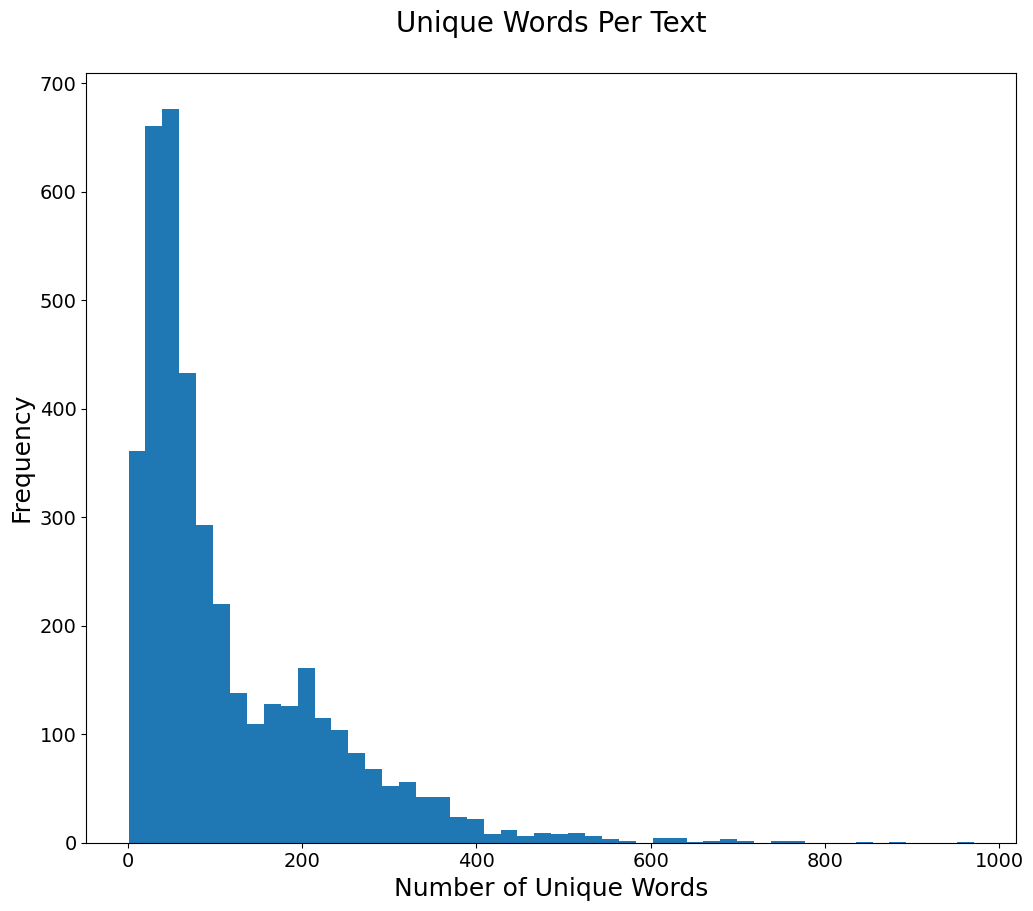

In [82]:
ax=df_news['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Text\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

## Lexical Richness

In [85]:
from collections import Counter
def calculate_mtld(text, chunk_size=100):
    tokens = text.split()  # Tokenize the text (simple splitting by whitespace)

    unique_words = set()  # Track unique words
    mtld_count = 0
    total_tokens = len(tokens)

    for i, token in enumerate(tokens):
        unique_words.add(token)

        if len(unique_words) >= chunk_size:
            mtld_count += 1
            unique_words.clear()

    # Calculate MTLD score
    mtld_score = total_tokens / (mtld_count + 1)

    return mtld_score

In [86]:
df_news['MTLD'] = df_news['article_text'].apply(lambda x: calculate_mtld(x))

## COUNT NOUNS VERBS ADJECTIVES

In [98]:
import spacy
# from spacy import displacy 
from spacy.matcher import Matcher
import pandas as pd
import unicodedata
from unidecode import unidecode
from Levenshtein import *
from collections import defaultdict
import textdescriptives as td  #TEXTDESCRIPTIVES FR PSACY3
import numpy as np
nlp = spacy.load("el_core_news_lg")

In [99]:
# Function to process text and count nouns, verbs, and adjectives
def find_nouns_verbs_adjectives(text):
    doc = nlp(text)
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjectives = sum(1 for token in doc if token.pos_ == "ADJ")
    return nouns, verbs, adjectives

In [101]:
# Apply the function to each row of the DataFrame
df_news[["Nouns", "Verbs", "Adjectives"]] = df_news["cleaned_text_lemmas"].apply(lambda x: pd.Series(find_nouns_verbs_adjectives(x)))

In [126]:
df_news.article_title[1456]

'Tραμπ, ο μεγαλύτερος νικητής-ηττημένος στην ιστορία των ΗΠΑ : aek365 '

In [127]:
df_news.article_title[146]

'RT @ThanSarr: Ο Βέλα ξαναθύμισε wonderkid  via @gazzetta_gr'

In [129]:
df_news.article_title[2346]

'Καλοκαιρινός ο καιρός σήμερα -  '

In [111]:
import unidecode
import re

def clean_keywords(keyword):
    cleaned = re.sub(r'%20', ' ', keyword)
    return cleaned
def remove_accents(keyword):
    cleaned = unidecode.unidecode(keyword)
    return cleaned
def remove_punctuation(keyword):
    cleaned = re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ",keyword)
    return cleaned

In [124]:
df_news['cleaned_title'] = df_news['article_title'].apply(lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip()))

In [ ]:
df_news.cleaned_title[1]

## Intensity Lexcicon

In [48]:
import nltk.sentiment
w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,fear,joy,sadness, trust, disgust, anticipation, surprise in df[['w','anger','fear','joy','sadness', 'trust', 'disgust', 'anticipation', 'surprise']].values:
    w2affects[w] = {'anger':anger,'joy':joy,'sadness':sadness,'fear':fear,'trust': trust, 'disgust':disgust, 'anticipation':anticipation,'surprise': surprise }

def get_affect_intensity_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return {'anger':np.nan,'joy':np.nan,'sadness':np.nan,'fear':np.nan,'trust':np.nan,'disgust':np.nan,'anticipation':np.nan,'surprise':np.nan}
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return dict(scores)

get_affect_intensity_score('Υπάρχει πολύ μίσος και αηδία στην ατμόσφαιρα. Είσαι απαίσιος!')

{'anger': 0.8410000000000001,
 'joy': 0.0,
 'sadness': 0.5833333333333334,
 'fear': 0.6043333333333333,
 'trust': 0.0,
 'disgust': 0.6956666666666668,
 'anticipation': 0.0,
 'surprise': 0.0}

In [49]:
# only anger 

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,fear,joy,sadness in df[['w','anger','fear','joy','sadness']].values:
    w2affects[w] = {'anger':anger,'joy':joy,'sadness':sadness,'fear':fear}

def get_anger_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return {'anger':np.nan,'joy':np.nan,'sadness':np.nan,'fear':np.nan}
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[0]

get_anger_score('Είμαι πολύ θυμωμένος και έχω νεύρα και θυμό και δεν αντέχω!')

0.4056666666666667

In [50]:
df_news ['Anger_intensity'] = df_news['cleaned_text_lemmas'].apply(lambda x: get_anger_score(x))

In [51]:
# only joy

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,fear,joy,sadness in df[['w','anger','fear','joy','sadness']].values:
    w2affects[w] = {'anger':anger,'joy':joy,'sadness':sadness,'fear':fear}

def get_joy_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return {'anger':np.nan,'joy':np.nan,'sadness':np.nan,'fear':np.nan}
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[1]

get_joy_score('είσαι ωραίος και χαίρομαι να σε βλέπω.')

0.4695

In [52]:
df_news ['Joy_intensity'] = df_news['cleaned_text_lemmas'].apply(lambda x: get_joy_score(x))

In [53]:
# only sadness

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,fear,joy,sadness in df[['w','anger','fear','joy','sadness']].values:
    w2affects[w] = {'anger':anger,'joy':joy,'sadness':sadness,'fear':fear}

def get_sadness_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return {'anger':np.nan,'joy':np.nan,'sadness':np.nan,'fear':np.nan}
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[2]

get_sadness_score('Δεν μπορεί να ζούμε αυτή την τραγωδία που έπληξε τη χώρα. ')



0.688

In [54]:
df_news ['Sadness_intensity'] = df_news['cleaned_text_lemmas'].apply(lambda x: get_sadness_score(x))

In [55]:
# only fear

w2affect = []
for w,score,dim in AIL_df.values:
    w2affect.append({dim:score,'w':w})
w2affects = {}
df = pd.DataFrame(w2affect)
df = df.groupby('w').sum().reset_index()
for w,anger,fear,joy,sadness in df[['w','anger','fear','joy','sadness']].values:
    w2affects[w] = {'anger':anger,'joy':joy,'sadness':sadness,'fear':fear}

def get_fear_score(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
    assert type(doc)==list,"please input either a list or a string"
    matches = []
    for w in doc:
        w = w.lower()
        if w in w2affects:
            matches.append(w2affects[w])
    if len(matches)==0:
        return {'anger':np.nan,'joy':np.nan,'sadness':np.nan,'fear':np.nan}
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg=='max':
        scores =  scores.max()
    else:
        scores = agg(scores)
    return list(dict(scores).values())[3]

get_fear_score('Είναι φοβερή η τραγωδία που έπληξε τη χώρα. ')

0.562

In [56]:
df_news ['Fear_intensity'] = df_news['cleaned_text_lemmas'].apply(lambda x: get_fear_score(x))

In [57]:
df_news [['Anger_intensity','Joy_intensity', 'Sadness_intensity','Fear_intensity']]

,Anger_intensity,Joy_intensity,Sadness_intensity,Fear_intensity
0,0.0,0.20175,0.0,0.0
1,0.0355,0.112958,0.065792,0.090792
2,0.110935,0.121742,0.019581,0.080613
3,0.0,0.180333,0.0,0.0
4,0.08995,0.09395,0.08635,0.1637
...,...,...,...,...
9995,0.0,0.1798,0.0,0.0076
9996,0.085149,0.074809,0.107532,0.107404
9997,0.328,0.0,0.0,0.312
9998,0.086769,0.118385,0.038462,0.115385


In [58]:
cols = ['Anger_intensity', 'Joy_intensity', 'Sadness_intensity',
       'Fear_intensity']
df_news[cols] = df_news[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [60]:
df_news

,site,article_url,article_title,article_text,fb_in_id,fb_url,fb_text,fb_datetime,fb_likes,fb_comments,...,mean_word_length,n_stop_words,first_order_coherence,n_tokens,n_unique_tokens,sources,Anger_intensity,Joy_intensity,Sadness_intensity,Fear_intensity
0,pentapostagma,http://www.pentapostagma.gr/2016/03/%cf%80%cf%...,Πως θα φέρω την οικογένειά μου κοντά στην Εκκλ...,Ομιλία Γέροντος Νεκταρίου Μουλατσιώτη με θέμα...,24218.0,https://www.facebook.com/114954161944042/posts...,Πως θα φέρω την οικογένειά μου κοντά στην Εκκλ...,2016-03-05T13:25:11Z,15.0,0.0,...,4.975610,9.0,0.232586,35.0,33.0,0,0.000000,0.201750,0.000000,0.000000
1,pentapostagma,http://www.pentapostagma.gr/2016/03/%ce%bc%ce%...,Μιχαήλ Τσίριμπας ο ακούραστος δάσκαλος ! ! ! -...,Διατηρεί τη μεγαλύτερη Ιστορική και Θρησκευτι...,24219.0,https://www.facebook.com/114954161944042/posts...,Μιχαήλ Τσίριμπας ο ακούραστος δάσκαλος! - Pent...,2016-03-04T08:50:15Z,2.0,0.0,...,5.604255,93.0,0.507847,213.0,158.0,0,0.035500,0.112958,0.065792,0.090792
2,pentapostagma,http://www.pentapostagma.gr/2016/03/%cf%84%ce%...,Τέλος και επίσημα ο Σταυρός από τη σημαία!,"Δημοσίευση: 11 Μαρτίου 2016, 11:24 πμ | Α...",24224.0,https://www.facebook.com/114954161944042/posts...,Τέλος και επίσημα ο Σταυρός από τη σημαία! - P...,2016-03-11T11:46:12Z,10.0,4.0,...,4.716621,150.0,0.443236,328.0,228.0,0,0.110935,0.121742,0.019581,0.080613
3,pentapostagma,http://www.pentapostagma.gr/2016/03/%cf%84%ce%...,Το κοινό μυστικό των τριών Ευαγγελίων - Γέροντ...,Ομιλία Γέροντος Νεκταρίου Μουλατσιώτη με θέμα...,24231.0,https://www.facebook.com/114954161944042/posts...,Το κοινό μυστικό των τριών Ευαγγελίων - Γέροντ...,2016-03-15T14:45:12Z,1.0,0.0,...,4.878049,7.0,0.186273,35.0,33.0,0,0.000000,0.180333,0.000000,0.000000
4,pentapostagma,http://www.pentapostagma.gr/2016/03/%ce%b2%ce%...,ΒΙΝΤΕΟ: Ο π. Γ. Μεταλληνός μιλάει για το 1821,Συμπληρώνονται φέτος 195 χρόνια από την Έναρξ...,24245.0,https://www.facebook.com/114954161944042/posts...,ΒΙΝΤΕΟ: Ο π. Γ. Μεταλληνός μιλάει για το 1821 ...,2016-03-25T00:25:11Z,9.0,1.0,...,4.617978,67.0,0.392166,147.0,100.0,0,0.089950,0.093950,0.086350,0.163700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sportdog,http://www.sportdog.gr/sports/podosfairo/artic...,"Καταφτάνει στην Αθήνα ο Λάζαρος, συμφωνία για ...",Στην Αθήνα αναμένεται να βρίσκεται μέχρι το μ...,769621.0,https://www.facebook.com/77310553857/posts/101...,"Καταφτάνει στην Αθήνα ο Λάζαρος, συμφωνία για ...",2016-08-26T12:08:25Z,0.0,1.0,...,4.896552,11.0,0.213775,26.0,24.0,0,0.000000,0.179800,0.000000,0.007600
9996,sportdog,http://www.sportdog.gr/sports/podosfairo/artic...,"Ο Στράμα ""διαβάζει"" Αλέφαντο και αλλάζει τον Π...",Ο Παναθηναϊκός ξεπέρασε εύκολα το εμπόδιο της...,769622.0,https://www.facebook.com/77310553857/posts/101...,Ο Στράμα διαβάζει Αλέφαντο και αλλάζει τον ΠΑΟ...,2016-08-26T11:28:07Z,2.0,0.0,...,4.685353,277.0,0.736800,502.0,273.0,0,0.085149,0.074809,0.107532,0.107404
9997,sportdog,http://www.sportdog.gr/sports/podosfairo/artic...,"Τοποθέτηση- «φωτιά» για ΠΑΟ: «Φέτος, δε φοβόμα...",Ο Παναθηναϊκός πήρε πανηγυρική πρόκριση για τ...,769664.0,https://www.facebook.com/77310553857/posts/101...,"Τοποθέτηση- «φωτιά» για ΠΑΟ: «Φέτος, δε φοβόμα...",2016-08-26T20:40:44Z,2.0,0.0,...,4.965517,11.0,0.153358,25.0,25.0,0,0.328000,0.000000,0.000000,0.312000
9998,sportdog,http://www.sportdog.gr/sports/podosfairo/artic...,Τι λέει ο Ολυμπιακός για Καρντόσο @olympiacos_org,Ανατροπή υπάρχει τις τελευταίες ώρες με την υ...,769665.0,https://www.facebook.com/77310553857/posts/101...,Τι λέει ο Ολυμπιακός για Καρντόσο Olympiacos F...,2016-08-26T19:25:07Z,5.0,0.0,...,4.950276,88.0,0.360064,162.0,105.0,0,0.086769,0.118385,0.038462,0.115385


In [276]:
df_news['joy']

0       2
1       0
2       1
3       6
4       0
       ..
3995    0
3996    2
3997    0
3998    0
3999    1
Name: joy, Length: 4000, dtype: int64

In [284]:
df_news['joy'] =  df_news['joy']/ df_news['uniq_wds'] *100

In [285]:
df_news['joy']

0       190.734863
1         0.000000
2         0.515789
3         0.871146
4         0.000000
           ...    
3995      0.000000
3996      9.925006
3997      0.000000
3998      0.000000
3999     13.676867
Name: joy, Length: 4000, dtype: float64

In [293]:
df_news.columns

Index(['index', 'site', 'article_url', 'article_title', 'article_text',
       'fb_in_id', 'fb_url', 'fb_text', 'fb_datetime', 'fb_likes',
       'fb_comments', 'total_fb_posts', 'total_fb_likes', 'total_fb_comments',
       'tw_in_id', 'tw_url', 'tw_text', 'tw_datetime', 'tw_retweets',
       'tw_mentions', 'total_tweets', 'total_retweets', 'total_mentions',
       'site_tw_followers', 'site_tw_following', 'total_followers',
       'total_following', 'cleanedtext', 'cleaned_text_lemmas', 'anger',
       ' anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive',
       'sadness', 'surprise', 'trust', 'valence', 'arousal', 'dominance',
       'strongsubj', ' weaksubj', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'smog', 'gunning_fog', 'n_characters',
       'n_sentences', 'dependency_distance_mean', 'mean_word_length',
       'n_stop_words', 'first_order_coherence', 'n_tokens', 'n_unique_tokens',
       'sources', 'num_wds', 'uniq_wds', 'MTLD', 'Nouns', 'Verbs',
      

In [297]:
df_news = df_news.rename(columns={' anticipation': 'anticipation','num_words': 'length'})

In [287]:
df_news['anger'] =  df_news['anger']/ df_news['uniq_wds'] *100

In [290]:
df_news['disgust'] =  df_news['disgust']/ df_news['uniq_wds'] *100
df_news['fear'] =  df_news['fear']/ df_news['uniq_wds'] *100
df_news['surprise'] =  df_news['surprise']/ df_news['uniq_wds'] *100
df_news['trust'] =  df_news['trust']/ df_news['uniq_wds'] *100
df_news['sadness'] =  df_news['sadness']/ df_news['uniq_wds'] *100
df_news['negative'] =  df_news['negative']/ df_news['uniq_wds'] *100

In [294]:
df_news['positive'] =  df_news['positive']/ df_news['uniq_wds'] *100

In [296]:
df_news['anticipation'] =  df_news['anticipation']/ df_news['uniq_wds'] *100

## Count celebrities etc

In [ ]:
# ιδανικά ένα if ent.label_ == "PERSON" ώστε να κραταει μονο τα persons όχι και τα ονόματα οδών 

In [193]:
def get_entities(text):
    doc = nlp(text)
    entity_info = [(ent.text) for ent in doc.ents]
    return entity_info

In [194]:
doc = nlp("Ήρθε η Αννα Βισση και ο Σκοιχάς και ο βατραχος και η μηχανη")
for ent in doc.ents:
    print(ent.text)

Αννα Βισση
Σκοιχάς


In [195]:
get_entities(doc)

['Αννα Βισση', 'Σκοιχάς']

In [196]:
df_news['names'] = df_news['article_text'].apply(lambda x: get_entities(x))

In [197]:
df_news['names'] = df_news['names'].apply(', '.join)

In [198]:
def drop_duplicates(row):
    # Split string by ', ', drop duplicates and join back.
    words = row.split(', ')
    return ', '.join(np.unique(words).tolist())

# drop_duplicates is applied to all rows of df.
df_news['names'] = df_news['names'].apply(drop_duplicates)

In [199]:
df_news['names']

0       Vistabet, Κρασνοντάρ, Μαμάεβ, Μπαρτσελόνα, Τέρ...
1       Facebook, Νίκος Κουλόπουλος, Ολυμπιακού Χωριού...
2       Αννα, Αννα Κορακάκη, Γερμανία, ΕΟΕ, Ελλάδα, Ελ...
3       Αννα, Αννα Κορακάκη, Αννας, Γκεστ, ΕΟΕ, Ελλάδα...
4       Hλίας Ηλιάδης, Ippon, Ελλάδα, Ηλία, Ηλιάδης, Μ...
                              ...                        
3995    Βόλο, Βόλου, Πήλιο, Πορταριάς, Τροχαία Βόλου, ...
3996    All I Want For Christmas, Chris Martin, Demi L...
3997    Εξάρχεια, Ιουστινιανού στα, Κάνιγγος, Καλλιδρο...
3998    Γεωδυναμικού Ινστιτούτου, Εθνικού Αστεροσκοπεί...
3999                                           Άννα Βίσση
Name: names, Length: 4000, dtype: object

In [203]:
politicians = pd.read_csv('../TO_KEEP/politiciansel.csv')
politicians.head()

,Politician
0,Ελευθέριος Βενιζέλος
1,Ιωάννης Καποδίστριας
2,Γεώργιος Παπανδρέου
3,Κωνσταντίνος Καραμανλής
4,Ανδρέας Παπανδρέου


In [204]:
politicians_list = politicians['Politician'].tolist()
politicians_list

['Ελευθέριος Βενιζέλος',
 'Ιωάννης Καποδίστριας',
 'Γεώργιος Παπανδρέου',
 'Κωνσταντίνος Καραμανλής',
 'Ανδρέας Παπανδρέου',
 'Κώστας Καραμανλής',
 'Γιώργος Παπανδρέου',
 'Αλέξης Τσίπρας',
 'Κυριάκος ΜητσοτάκηςΚυριάκος Μητσοτάκης',
 'Χρήστος Σταϊκούρας',
 'Νίκος Δένδιας',
 'Νίκος Παναγιωτόπουλος',
 'Κώστας Τσιάρας',
 'Τάκης Θεοδωρικάκος',
 'Νίκη Κεραμέως',
 'Θάνος Πλεύρης',
 'Κωστής Χατζηδάκης',
 'Κώστας Καραμανλής',
 'Κώστας Σκρέκας',
 'Μάκης Βορίδης',
 'Βασίλης Κικίλιας',
 'Λίνα Μενδώνη',
 'Γιώργος Γεραπετρίτης',
 'Άγγελος Συρίγος',
 'Θεόδωρος Λιβάνιος',
 'Γιώργος Στύλιος',
 'Βασίλης Διγαλάκης',
 'Γιώργος Αμυράς',
 'Θεόδωρος Βλάχος ',
 'Αβράμης Δημήτριος',
 'Αγαπιδάκη Ειρήνη',
 'Αθανασίου Χαράλαμπος',
 'Ακτίπης Διονύσιος',
 'Αλεξοπούλου Χριστίνα',
 'Αμυράς Γεώργιος',
 'Αντωνιάδης Ιωάννης',
 'Αντωνίου Μαρία',
 'Αραμπατζή Φωτεινή',
 'Αυγενάκης Ελευθέριος',
 'Αυγενινοπούλου Διονυσία-Θεοδώρα',
 'Βαρβιτσίωτης Μιλτιάδης',
 'Βαρνάβας Δημήτριος',
 'Βασιλειάδης Βασίλειος (Λάκης)',
 'Βεσυρόπου

In [212]:
celebrities = pd.read_csv('../TO_KEEP/celebrities')
celebrities.head()

,celebrities
0,Χρόνης Εξαρχάκος
1,Γιώργος Φούντας
2,Τάσος Γιαννόπουλος
3,Γιάννης Γκιωνάκης
4,Άγγελος Γραμμένος


In [213]:
[celebrities['celebrities'].unique() for col_name in celebrities.columns]

[array(['Χρόνης Εξαρχάκος', 'Γιώργος Φούντας', 'Τάσος Γιαννόπουλος', ...,
        'Βίκυ Χατζηβασιλείου', 'Χριστίνα Λαμπίρη', 'Ηλιάνα Παπαγεωργίου'],
       dtype=object)]

In [214]:
celebrities_list = celebrities['celebrities'].tolist()
celebrities_list

['Χρόνης Εξαρχάκος',
 'Γιώργος Φούντας',
 'Τάσος Γιαννόπουλος',
 'Γιάννης Γκιωνάκης',
 'Άγγελος Γραμμένος',
 'Στάθης Γιαλελής',
 'Κώστας Χατζηχρήστος',
 'Αντώνης Καφετζόπουλος',
 'Τζένη Καρέζη',
 'Κώστας Καζάκος',
 'Σμαράγδα Καρύδη',
 'Κόρα Καρβούνη',
 'Βαγγέλης Καζάν',
 'Βασίλης Καραμεσίνης',
 'Μάνος Κατράκης',
 'Λάμπρος Κωσταντάρας',
 'Γιώργος Κωνσταντίνου',
 'Ηλίας Κοτέας',
 'Παύλος Κουρτίδης',
 'Ζωή Λάσκαρη',
 'Θάνος Λειβαδίτης',
 'Ζέτα Μακρυπούλια',
 'Κώστας Θεοδοσόπουλος',
 'Λούης Θεοδοσόπουλος',
 'Μελίνα Μερκούρη',
 'Γιάννης Μιχαλόπουλος',
 'Πάνος Μιχαλόπουλος',
 'Mέμος Μπεγνής',
 'Έλενα Ναθαναήλ',
 'Δημήτρης Νικολαΐδης',
 'Ντίνος Ηλιόπουλος',
 'Κλειώ-Δανάη Οθωναίου',
 'Διονύσης Παπαγιαννόπουλος',
 'Δημήτρης Παπαμιχαήλ',
 'Ειρήνη Παππά',
 'Κατίνα Παξινού',
 'Άννα Ρεζάν',
 'Νίκος Ρίζος',
 'Τέλης Σαβάλας',
 'Κώστας Τριανταφυλλόπουλος',
 'Τίτος Βανδής',
 'Αιμίλιος Βεάκης',
 'Αντιγόνη Βαλάκου',
 'Νορα Βαλσάμη',
 'Θανάσσης Βέγγος',
 'Γιώργος Βελέντζας',
 'Ρένα Βλαχοπούλου',
 'Γιάννης

In [216]:
joinedlist = celebrities_list + politicians_list

In [217]:
def find_celebs(row):
    celebrities = []
    # Split string by ', ', drop duplicates and join back.
    words = row.split(', ')
    for i in words:
        if i in joinedlist:
            
            celebrities.append(i)
    return celebrities
                


# drop_duplicates is applied to all rows of df.
df_news['celebrities'] = df_news['names'].apply(find_celebs)

In [218]:
df_news['celebrities']

0                     []
1                     []
2       [Κατερίνα Λέχου]
3                     []
4                     []
              ...       
3995                  []
3996                  []
3997                  []
3998                  []
3999        [Άννα Βίσση]
Name: celebrities, Length: 4000, dtype: object

In [222]:
def count_celebs(row):
    celebrities = []
    count  =0
    # Split string by ', ', drop duplicates and join back.
    words = row.split(', ')
    for i in words:
        
        if i in joinedlist:
            
            celebrities.append(i)
            count +=1 
    return count
                


# drop_duplicates is applied to all rows of df.
df_news['No Celebs'] = df_news['names'].apply(count_celebs)

In [223]:
df_news['No Celebs']

0       0
1       0
2       1
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    1
Name: No Celebs, Length: 4000, dtype: int64

In [224]:
df_news['No Celebs'].describe()

count    4000.00000
mean        0.46875
std         1.26804
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        19.00000
Name: No Celebs, dtype: float64

In [225]:
animals = pd.read_csv('../TO_KEEP/animals')
animals.tail()

,ζώο
176,τιγράκι
177,λιοντάρι
178,λιοντάράκι
179,λιονταρίνα
180,λιονταράκι


In [226]:
animal_list = animals['ζώο'].tolist()
animal_list

['πουλί',
 'έντομο',
 'σκύλος',
 'κουτάβι',
 'χελώνα',
 'κουνέλι',
 'παπαγάλος',
 'γάτα',
 'γατάκι',
 'χρυσόψαρο',
 'ποντίκι',
 'τροπικά ψάρια',
 'χάμστερ',
 'αγελάδα',
 'κουνέλι',
 'πάπιες',
 'γαρίδες',
 'χοίρος',
 'κατσίκα',
 'καβούρι',
 'ελάφι',
 'μέλισσα',
 'πρόβατο',
 'ψάρια',
 'γαλοπούλα',
 'περιστέρι',
 'κοτόπουλο',
 'άλογο',
 'κοράκι',
 'παγώνι',
 'περιστέρι',
 'σπουργίτι',
 'χήνα',
 'πελαργός',
 'περιστέρι',
 'γαλοπούλα',
 'γεράκι',
 'φαλακρός αετός',
 'κοράκι',
 'παπαγάλος',
 'φλαμίνγκο',
 'γλάρος',
 'στρουθοκάμηλος',
 'χελιδόνι',
 'μαύρο πουλί',
 'πιγκουίνος',
 'ρομπέν',
 'κύκνος',
 'κουκουβάγια',
 'τρυποκάρυδος',
 'σκίουρος',
 'σκύλος',
 'χιμπατζής',
 'βόδι',
 'λιοντάρι',
 'πάντα',
 'βίδρα',
 'ποντίκι',
 'καγκουρό',
 'κατσίκα',
 'άλογο',
 'πίθηκος',
 'αγελάδα',
 'κοάλα',
 'τυφλοπόντικας',
 'ελέφαντας',
 'λεοπάρδαλη',
 'ιπποπόταμος',
 'καμηλοπάρδαλη',
 'αλεπού',
 'κογιότ',
 'σκαντζόχοιρος',
 'πρόβατο',
 'ελάφι',
 'καμηλοπάρδαλη',
 'τρυποκάρυδος',
 'καμήλα',
 'αστερίας',
 'κο

In [228]:
def find_animals(row):
    animals = []
    words = row.split(' ')
    for i in words:
        if i in animal_list:
            animals.append(i)
    return animals
                
df_news['animal'] = df_news['cleaned_text_lemmas'].apply(find_animals)

In [231]:
df_news['animal'].value_counts().head(200)

[]                      3852
[γάτα]                    25
[τίγρης]                   9
[σκύλος]                   7
[χταπόδι]                  5
                        ... 
[πουλί, λύκος]             1
[κατσαρίδα]                1
[κοτόπουλο, χταπόδι]       1
[φλαμίνγκο]                1
[ποντίκι]                  1
Name: animal, Length: 82, dtype: int64

In [232]:
def count_animals(row):
    animals = []
    count  =0
    words = row.split(' ')
    for i in words:
        
        if i in animal_list:
            
            animals.append(i)
            count +=1 
    return count

df_news['animal'] = df_news['cleaned_text_lemmas'].apply(count_animals)

In [235]:
crime = pd.read_csv('../TO_KEEP/crime.csv')
crime.tail()

,crime
188,πυροβολισμοί
189,Όπλο
190,Δολοφόνος
191,Συγγενής
192,Αυτοψία


In [236]:
crime['crime'] = crime['crime'].str.lower()

In [246]:
crime_list = crime['crime'].tolist()
crime_list

['έγκλημα',
 'απαγωγή ',
 'γυναικοκτονία',
 'παιδοκτονία',
 'παιδοκτόνος',
 'γυναικοκτόνος',
 'παιδεραστής',
 'παιδεραστία',
 'σεξουαλική κακοποίηση',
 'εμπρησμός ',
 'εμπρηστής',
 'δολοφονία ',
 'δολοφόνος',
 'επίθεση',
 'επιτιθέμενος',
 'διγαμία',
 'εκβιασμός',
 'εκβιαστής',
 'βιάζω',
 'έγκλημα κατά ζωής',
 'βομβιστική επίθεση',
 'βομβιστής',
 'δωροδοκία',
 'δωροδοκία',
 'διάρρηξη',
 'διαρρήκτης ',
 'παιδεραστής',
 'διαφθορά ',
 'έγκλημα ',
 'εγκληματίας',
 'έγκλημα στον κυβερνοχώρο',
 'hacker',
 'ενδοοικογενειακή βία',
 'βία  ',
 'οδήγηση υπό την επήρεια αλκοόλ',
 'αίμα ',
 'μεθυσμένος οδηγός',
 'υπεξαίρεση ',
 'καταχραστής',
 'κατασκοπεία ',
 'κατασκοπεία',
 'κατάσκοπος',
 'πλαστογραφία ',
 'πλαστογράφος',
 'απάτη',
 'απατεώνας',
 'απάτη',
 'γενοκτονία ',
 'αεροπειρατεία',
 'αεροπειρατής',
 'χτύπημα και εγκατάλειψη  ',
 'ανθρωποκτονία ',
 'δολοφονία ',
 'χουλιγκανισμός',
 'χούλιγκαν',
 'κλοπή ταυτότητας ',
 'κλοπή',
 'απαγωγή ',
 'απαγωγέας',
 'συκοφαντική δυσφήμιση  ',
 'λεηλασία'

In [247]:
def find_crime(row):
    crime = []
    # Split string by ', ', drop duplicates and join back.
    words = row.split(' ')
    #print(words)
    for i in words:
        if i in crime_list:
            
            crime.append(i)
    return crime
                


# drop_duplicates is applied to all rows of df.
df_news['crime'] = df_news['cleaned_text_lemmas'].apply(find_crime)

In [248]:
df_news['crime'].value_counts()

[]                                                                                         3141
[επίθεση]                                                                                    89
[όπλο]                                                                                       34
[συγγενής]                                                                                   34
[βία]                                                                                        31
                                                                                           ... 
[επίθεση, επίθεση, άλλοθι, ζημιά]                                                             1
[επίθεση, εκβιασμός]                                                                          1
[επίθεση, επίθεση, επίθεση, τρομοκρατία, επίθεση, επίθεση, επίθεση, βομβιστής, επίθεση]       1
[ύποπτος, όπλο]                                                                               1
[λαθρεμπόριο]                           

In [249]:
df_news['crime']

0              []
1              []
2              []
3              []
4              []
          ...    
3995           []
3996           []
3997    [επίθεση]
3998      [ζημιά]
3999           []
Name: crime, Length: 4000, dtype: object

In [250]:
def count_crime(row):
    crime = []
    count  =0
    words = row.split(' ')
    for i in words:
        
        if i in crime_list:
            
            crime.append(i)
            count +=1 
    return count
df_news['crime'] = df_news['cleaned_text_lemmas'].apply(count_crime)

In [244]:
df_news['crime']

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    1
3998    1
3999    0
Name: crime, Length: 4000, dtype: int64

## Κεφαλαία στο κείμενο

In [273]:
import re

regex = r'\b[A-Z]{5,}\b'

df_news['caps_body'] = df_news['article_text'].str.findall(regex)
df_news['caps_body'] =df_news['caps_body'].str.len()

In [275]:
df_news['caps_body'].value_counts()

0     3662
1      174
2      118
3       20
4       12
5        7
6        2
20       1
9        1
11       1
34       1
7        1
Name: caps_body, dtype: int64

## Νούμερα 

In [272]:
df_news['numbers'] = df_news['article_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [ ]:
## ίσως να μετρήσω προσωπικές αντωνυμίες

## Links

In [264]:
import re

def find_links(text):
    urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', text)
    return urls

def number_links(text):
    urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', text)
    number = len(urls)
    return number

In [265]:
df_news['urls'] = df_news.article_text.apply(find_links)

In [266]:
df_news['urls'].value_counts()

[]                                                                                                      3955
[https://www.viva.gr]                                                                                     10
[https://t.co]                                                                                             7
[http://www.aekbc.gr, https://www.viva.gr]                                                                 5
[https://t.co, https://t.co]                                                                               2
[https://www.youtube.com]                                                                                  2
[https://www.facebook.com]                                                                                 2
[https://itunes.apple.com, https://play.google.com, http://www.windowsphone.com]                           1
[https://www.greatagain.gov]                                                                               1
[https://portal.ast

In [270]:
df_news[df_news['urls']==1]

,index,site,article_url,article_title,article_text,fb_in_id,fb_url,fb_text,fb_datetime,fb_likes,fb_comments,total_fb_posts,total_fb_likes,total_fb_comments,tw_in_id,tw_url,tw_text,tw_datetime,tw_retweets,tw_mentions,total_tweets,total_retweets,total_mentions,site_tw_followers,site_tw_following,total_followers,total_following,cleanedtext,cleaned_text_lemmas,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,valence,arousal,dominance,strongsubj,weaksubj,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,n_characters,n_sentences,dependency_distance_mean,mean_word_length,n_stop_words,first_order_coherence,n_tokens,n_unique_tokens,sources,num_wds,uniq_wds,MTLD,Nouns,Verbs,Adjectives,cleaned_title,names,celebrities,No Celebs,animal,crime,urls
119,119,gazzetta,http://www.gazzetta.gr/basketball/article/1005...,"RT @Giannis_Stavr: Ομπράντοβιτς: «Τσάβι, η ζωή...",Ο Ζέλικο Ομπράντοβιτς αποκάλυψε την κουβέντα ...,2738694.0,https://www.facebook.com/102175189751/posts/10...,"Ομπράντοβιτς: «Τσάβι, η ζωή συνεχίζεται!» Ο Ζο...",2016-11-09T17:52:59Z,180.0,1.0,1.0,180.0,1.0,2738683.0,https://twitter.com/gazzetta_gr/status/7963726...,"RT @Giannis_Stavr: Ομπράντοβιτς: «Τσάβι, η ζωή...",2016-11-09T17:23:41Z,0.0,2066.0,2.0,0.0,2101.0,56027.0,423.0,416672.0,828.0,Ζέλικο Ομπράντοβιτς αποκάλυψε κουβέντα Τσάβι Π...,Ζέλικο Ομπράντοβιτς αποκάλυψε κουβέντα Τσάβι Π...,12,26,0,18,26,22,63,8,10,38,0.691782,0.460057,0.495172,52,41,54.184971,8.790140,11.456787,11.809951,12315.0,192.0,2.481412,4.342736,1321.0,0.508656,2387.0,526.0,0,894,305,126.526316,288,240,97,(Ζέλικο Ομπράντοβιτς αποκάλυψε κουβέντα Τσάβι ...,"EuroLeague, Euroleague, Watch the full Weekly ...",[],0,0,0,1
240,240,aek365,http://www.aek365.com/a-445596/h-prwth-praksh-...,Σαν σήμερα:Η πρώτη πράξη του πιο μεγάλου έπους...,"ΣΑΝ ΣΗΜΕΡΑ, 2 Μαρτίου 1977, Κουίνς Παρκ Ρέιντ...",2745270.0,https://www.facebook.com/175803149121459/posts...,Η πρώτη πράξη του πιο μεγάλου έπους (VIDEO) - ...,2016-03-02T10:17:30Z,36.0,1.0,2.0,36.0,1.0,2745054.0,https://twitter.com/aek365gr/status/7049438975...,Σαν σήμερα:Η πρώτη πράξη του πιο μεγάλου έπους...,2016-03-02T10:18:17Z,1.0,132.0,1.0,1.0,132.0,12477.0,38.0,80838.0,38.0,ΣΗΜΕΡΑ Μαρτίου Κουίνς Παρκ Ρέιντζερς-ΑΕΚ 3-0 ι...,ΣΗΜΕΡΑ Μαρτίου Κουίνς Παρκ Ρέιντζερς-ΑΕΚ 3-0 ι...,3,9,1,5,5,15,13,6,6,9,0.421786,0.649921,0.569491,13,11,36.807110,12.587036,14.641700,16.229128,4637.0,49.0,2.465230,4.538160,373.0,0.442634,880.0,459.0,0,385,260,125.285714,128,55,62,(ΣΗΜΕΡΑ Μαρτίου Κουίνς Παρκ Ρέιντζερς-ΑΕΚ 3-0 ...,"2/3/97 Απόλλων-ΑΕΚ, AEK, ΑΕΚ, ΑΕΚ-Αθηναϊκός 5-...",[],0,0,1,1
1232,1232,aek365,http://www.aek365.com/a-484692/oloi-oi-dromoi-...,Όλοι οι δρόμοι οδηγούν στο ΟΑΚΑ,Για τον μεγάλο Γιώργο Τρόντζο και τη δεύτερη ...,2756044.0,https://www.facebook.com/175803149121459/posts...,Όλοι οι δρόμοι οδηγούν στο ΟΑΚΑ - 14/10 23:58 ...,2016-10-15T10:41:00Z,73.0,0.0,4.0,85.0,0.0,2756068.0,https://twitter.com/aek365gr/status/7871967873...,Όλοι οι δρόμοι οδηγούν στο ΟΑΚΑ\nhttps://t.co/...,2016-10-15T07:41:54Z,0.0,132.0,1.0,0.0,132.0,12439.0,38.0,100989.0,38.0,μεγάλο δεύτερη νίκη Βασίλισσας Εισιτήρια ευρώ ...,μεγάλος δεύτερος νίκη Βασίλισσα εισιτήρια ευρώ...,0,7,0,1,5,1,8,2,0,5,0.805353,0.657217,0.606622,8,5,24.035865,20.402885,18.643177,23.882249,1716.0,8.0,2.871173,4.756233,179.0,0.564513,338.0,177.0,0,125,93,112.666667,59,19,15,(μεγάλο δεύτερη νίκη Βασίλισσας Εισιτήρια ευρώ...,"Basket League, ΑΕΚ, Γιούρι Ζντοβτς, Γιώργο Τρό...",[],0,0,0,1
1271,1271,aek365,http://www.aek365.com/a-485652/ksekinhse-h-pro...,Ξεκίνησε η προπώληση για ΑΕΚ - Μπεσίκτας : aek...,Η Βασίλισσα υποδέχεται την 1η Νοεμβρίου την τ...,2756308.0,https://www.facebook.com/175803149121459/posts...,Ξεκίνησε η προπώληση για ΑΕΚ-Μπεσίκτας - 20/10...,2016-10-20T16:59:48Z,70.0,0.0,1.0,70.0,0.0,2756304.0,https://twitter.com/aek365gr/status/7891038977...,Ξεκίνησε η προπώληση για ΑΕΚ - Μπεσίκτας : aek...,2016-10-20T17:00:04Z,0.0,132.0,1.0,0.0,132.0,12439.0,38.0,81631.0,38.0,Βασίλισσα υποδέχεται 1η τουρκική 

In [271]:
df_news.article_text[119]

' Ο Ζέλικο Ομπράντοβιτς αποκάλυψε την κουβέντα που είχε με τον Τσάβι Πασκουάλ, τόνισε με νόημα ότι το χρήμα δεν είναι το παν και μίλησε για τον… loser Τεόντοσιτς! Ο Ζέλικο Ομπράντοβιτς «τρέχει» τα τελευταία χρόνια ένα εγχείρημα που οι άνθρωποι της Φενέρμπαχτσε πιστεύουν πως αν δεν το τελειοποιήσει ο πολυνίκης κόουτς στην ιστορία της EuroLeague , δεν υπάρχει μάλλον κάποιος που μπορεί να το κάνει. Οι της Φενέρ πίστεψαν ότι μια που θα καθίσει ο «Ζοτς» στον πάγκο τους και... μια που θα κατακτήσει την Euroleague . Πολύ σύντομα, θα διαπίστωναν ότι η πραγματικότητα είναι λίγο διαφορετική. Ο ίδιος, πάντως, παραχώρησε συνέντευξη στο ισπανικό περιοδικό Gigantes del Basket , υπενθυμίζοντας ότι « την EuroLeague την κατακτά μόνο ένας» και απευθύνοντας το απλό ερώτημα: «Θα αλλάξουμε, λοιπόν όλους τους προπονητές αν δεν το καταφέρουν;» . Ο Σέρβος κόουτς μίλησε για την ήττα στον τελικό του Βερολίνου από την ΤΣΣΚΑ του Δημήτρη Ιτούδη και το γεγονός ότι η Φενέρ έμεινε σχεδόν ίδια σε σχέση με πέρσι, έκανε

In [268]:
df_news['urls'] = df_news.article_text.apply(number_links)

In [61]:
df_news.to_csv("../INTENSITY_DATASETS/processed_low_sites_2016.csv_Multiprocess_batch_0_Featured.csv", index = False)